In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
#Read Data
#data = pd.read_csv('../../RealData/RealData.csv')
data = pd.read_csv('../../SynData/data/GeneratedData.csv')


In [3]:
#General data info
data.head()

,Unnamed: 0,CPU,throughput
0,0,0.354441,30.338909
1,1,0.493504,40.112504
2,2,0.961547,67.373333
3,3,0.758908,56.469337
4,4,0.347401,29.817774


In [4]:
data.describe()

,Unnamed: 0,CPU,throughput
count,300.000000,300.000000,300.000000
mean,149.500000,0.541960,41.353903
std,86.746758,0.295906,20.116394
min,0.000000,0.000412,0.041189
25%,74.750000,0.285819,25.139570
50%,149.500000,0.578239,45.630774
75%,224.250000,0.786403,58.020421
max,299.000000,0.998286,69.228988


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
Unnamed: 0    300 non-null int64
CPU           300 non-null float64
throughput    300 non-null float64
dtypes: float64(2), int64(1)
memory usage: 7.1 KB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


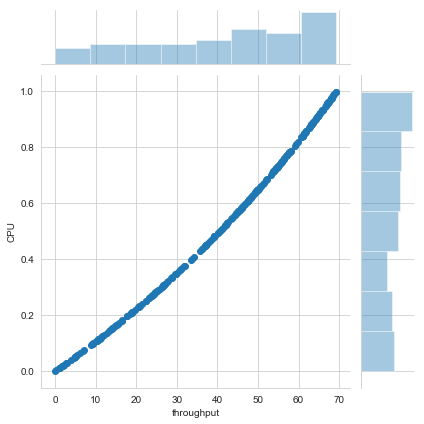

In [6]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter")


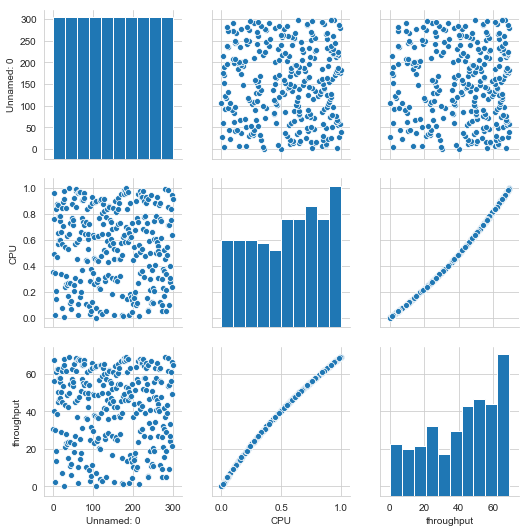

In [7]:
sns.pairplot(data)


In [8]:
data['throughput'].corr(data['CPU'])


0.9960984119006693

In [9]:
datalm = data


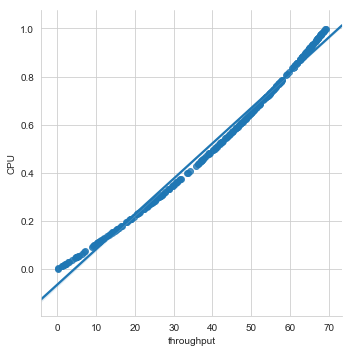

In [10]:
sns.lmplot(x='throughput',y='CPU',data=datalm)


In [11]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
lm = LinearRegression()
n = len(X)
kf = KFold(n_splits=5)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
lm.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
#Test data prediction
prediction = lm.predict(X_test)
X_test = np.array(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Throuput':X_test.flatten(),'Actual_CPU': y_test.flatten(), 'Predicted_CPU': prediction.flatten()})
df

,Throuput,Actual_CPU,Predicted_CPU
0,0.671546,0.592078,0.618442
1,0.586078,0.500662,0.531966
2,0.379941,0.301197,0.323397
3,0.274474,0.209630,0.216685
4,0.153184,0.112262,0.093964
5,0.963302,0.948188,0.913640
6,0.168069,0.123777,0.109025
7,0.452815,0.368485,0.397130
8,0.731907,0.659974,0.679515
9,0.295344,0.227223,0.237801


Text(0, 0.5, 'Predicted Y')

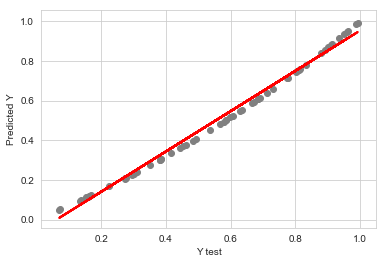

In [13]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")


In [14]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 0.022036073272871916
MSE: 0.0005939423674173505
RMSE: 0.024370932838472772


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


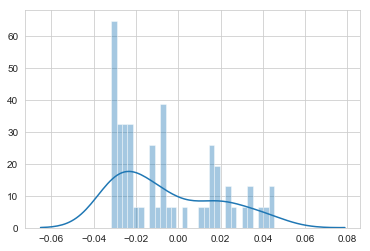

In [15]:
#Residuals
sns.distplot(y_test-prediction,bins=30)

In [16]:
# save the model to disk
filename = '../models/linearReg_model.sav'
pickle.dump(lm, open(filename, 'wb'))

In [17]:
lm.predict([[0]])

array([-0.06102685])